In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def repair_PPG(file_path):
    # Read the text file
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Remove trailing semicolons and split each line into data fields
    cleaned_data = []
    for line in lines[1:]:  # Skip the header line
        if line.strip():  # Skip empty lines
            fields = line.strip().rstrip(';').split(';')
            cleaned_data.append(fields)
    
    # Create DataFrame from cleaned data
    column_names = lines[0].strip().split(';')  # Extract column names from header
    df = pd.DataFrame(cleaned_data, columns=column_names)

    # Convert columns to appropriate dtypes
    df[['channel 0', 'channel 1', 'channel 2', 'ambient']] = df[['channel 0', 'channel 1', 'channel 2', 'ambient']].apply(pd.to_numeric)

    # df['mean_channel'] = df[['channel 0', 'channel 1', 'channel 2', 'ambient']].mean(axis=1)
    # df = df.drop(columns=["sensor timestamp [ns]", "channel 0", "channel 1", "channel 2", "ambient"])

    df['Phone timestamp'] = pd.to_datetime(df['Phone timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')

    return df

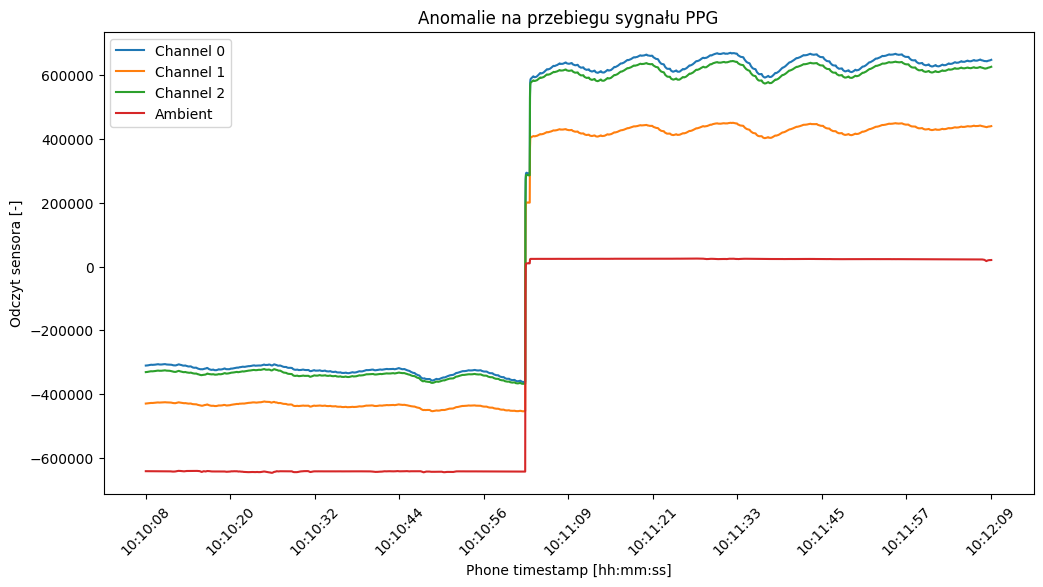

In [16]:


# Load the data from the specified file
# file_path = 'polar3/Polar_Sense_9F124324_20240425_222851_PPG_fixed.txt'
# df = pd.read_csv(file_path, delimiter=';')

df = repair_PPG("polar_data/polar_PPG/02_05_24_olson_1_PPG.txt")

# Drop the 'sensor timestamp [ns]' column
df = df.drop(columns=['sensor timestamp [ns]'])

# Convert 'Phone timestamp' to datetime if it's not already
df['Phone timestamp'] = pd.to_datetime(df['Phone timestamp'])

# Create a plot with reduced x-axis labels
plt.figure(figsize=(12, 6))

plt.plot(df['Phone timestamp'], df['channel 0'], label='Channel 0')
plt.plot(df['Phone timestamp'], df['channel 1'], label='Channel 1')
plt.plot(df['Phone timestamp'], df['channel 2'], label='Channel 2')
plt.plot(df['Phone timestamp'], df['ambient'], label='Ambient')

plt.xlabel('Phone timestamp [hh:mm:ss]')
plt.ylabel('Odczyt sensora [-]')
plt.title('Anomalie na przebiegu sygnału PPG')
plt.legend()

# Reduce the number of x-axis labels for readability
num_ticks = 10  # Number of ticks you want
ticks = df['Phone timestamp'][::len(df)//num_ticks]
labels = [tick.strftime('%H:%M:%S') for tick in ticks]  # Format to show only hour and minute

plt.xticks(ticks=ticks, labels=labels, rotation=45)

plt.show()



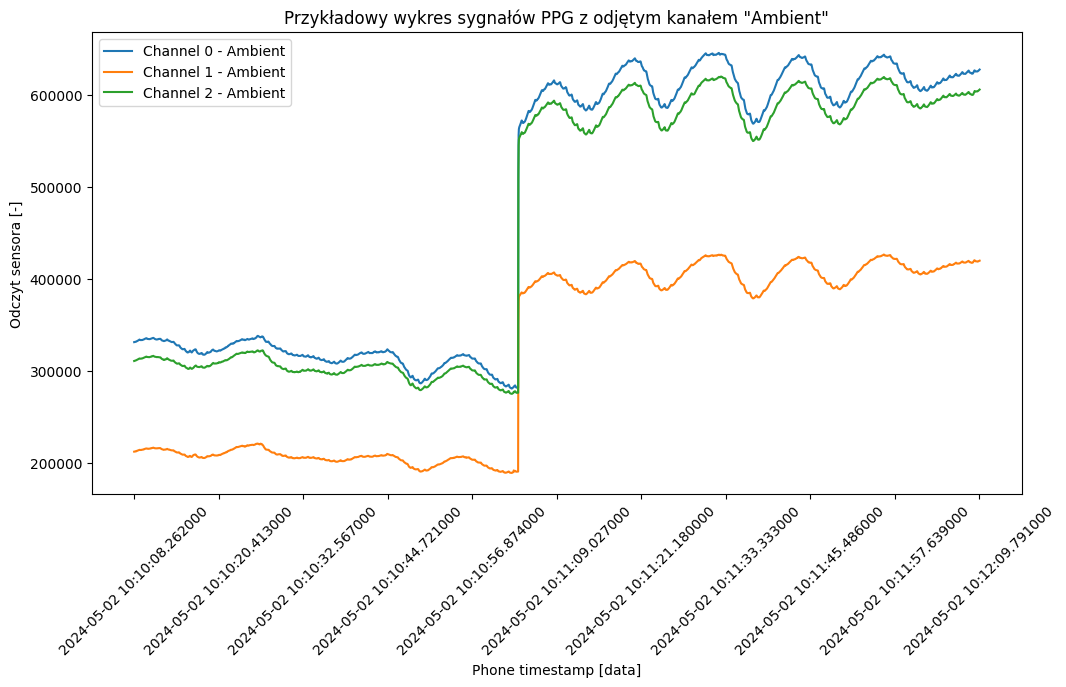

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# # Load the data from the specified file
# file_path = 'polar3/Polar_Sense_9F124324_20240425_222851_PPG_fixed.txt'
# df = pd.read_csv(file_path, delimiter=';')

df = repair_PPG("polar_data/polar_PPG/02_05_24_olson_1_PPG.txt")

# Drop the 'sensor timestamp [ns]' column
df = df.drop(columns=['sensor timestamp [ns]'])

# Subtract ambient channel from other channels
df['channel 0'] -= df['ambient']
df['channel 1'] -= df['ambient']
df['channel 2'] -= df['ambient']

# Create a plot with reduced x-axis labels
plt.figure(figsize=(12, 6))

plt.plot(df['Phone timestamp'], df['channel 0'], label='Channel 0 - Ambient')
plt.plot(df['Phone timestamp'], df['channel 1'], label='Channel 1 - Ambient')
plt.plot(df['Phone timestamp'], df['channel 2'], label='Channel 2 - Ambient')

plt.xlabel('Phone timestamp [data]')
plt.ylabel('Odczyt sensora [-]')
plt.title('Przykładowy wykres sygnałów PPG z odjętym kanałem "Ambient"')
plt.legend()

# Reduce the number of x-axis labels for readability
num_ticks = 10  # Number of ticks you want
plt.xticks(ticks=df['Phone timestamp'][::len(df)//num_ticks], labels=df['Phone timestamp'][::len(df)//num_ticks], rotation=45)

plt.show()


In [13]:
import pickle